<a href="https://colab.research.google.com/github/Axlbenja/MiamiDadeCounty_EmployeePay_2025/blob/main/Axel_Paredes_%E2%80%94_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
from IPython import get_ipython
from IPython.display import display
!pip install streamlit
import streamlit as st
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*ScriptRunContext.*")

In [257]:
def load_and_preprocess_data():

    url = "https://raw.githubusercontent.com/Axlbenja/axel.paredes/refs/heads/main/datatset_consumer_complaints.csv"
    df = pd.read_csv(url)

    df = df.dropna(subset=['Product', 'Issue'])
    df['Item'] = df['Product'] + " - " + df['Issue'].str.replace(',', '').str.strip()
    transactions = df.groupby(' ID')['Item'].apply(list).tolist()
    return transactions #This line was added to return the transactions variable.

In [258]:
df.head()

,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Resolution time(in days),Year,QTR (US FLY),Item
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",FL,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,0,2015,Q4,Mortgage - Loan servicing payments escrow account
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NC,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,0,2014,Q1,Mortgage - Loan servicing payments escrow account
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",MO,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,0,2014,Q4,Debt collection - Loan modificationcollectionf...
3,1303679,"Continental Finance Company, LLC",Credit card,Billing statement,WA,Web,03/26/2015,03/26/2015,Yes,No,Washington,3/26/2015,3/26/2015,0,2015,Q1,Credit card - Billing statement
4,1627370,Experian,Credit reporting,Unable to get credit report/credit score,VA,Web,10/27/2015,10/27/2015,Yes,No,Virginia,10/27/2015,10/27/2015,0,2015,Q4,Credit reporting - Unable to get credit report...


In [259]:
print(df.columns)

Index([' ID', 'Company', 'Product', 'Issue', 'State', 'Submitted via',
       'Date received', 'Date resolved', 'Timely response?',
       'Consumer disputed?', 'state name', 'Date received.1',
       'Date resolved.1', 'Resolution time(in days)', 'Year', 'QTR (US FLY)',
       'Item'],
      dtype='object')


#Data Preprocessing

In [260]:
df = df.dropna(subset=['Product', 'Issue'])

In [261]:
df['Item'] = df['Product'] + " - " + df['Issue'].str.replace(',', '').str.strip()

In [262]:
transactions = load_and_preprocess_data()

In [263]:
te = TransactionEncoder()

In [264]:
te_ary = te.fit(transactions).transform(transactions)

In [265]:
basket = pd.DataFrame(te_ary, columns=te.columns_)

In [266]:
print(basket.head())

   Bank account or service - Account opening closing or management  \
0                                               True                 
1                                              False                 
2                                              False                 
3                                              False                 
4                                              False                 

   Bank account or service - Deposits and withdrawals  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   Bank account or service - Making/receiving payments sending money  \
0                                              False                   
1                                              False                   
2                   

#Apriori and generate rules

In [267]:
min_support = 0.001

In [268]:
min_lift = 0.5

In [269]:
print(f"Using min_support = {min_support} and min_lift = {min_lift}")

Using min_support = 0.001 and min_lift = 0.5


In [270]:
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)

In [271]:
print("✅ Frequent Itemsets Found:")
if frequent_itemsets.empty:
    print("⚠️ No frequent itemsets found. Consider lowering `min_support` (e.g., to 0.001).")
else:
    print(frequent_itemsets.head(10))
print("-" * 50)

✅ Frequent Itemsets Found:
    support                                           itemsets
0  0.074786  (Bank account or service - Account opening clo...
1  0.044143  (Bank account or service - Deposits and withdr...
2  0.014929  (Bank account or service - Making/receiving pa...
3  0.026286  (Bank account or service - Problems caused by ...
4  0.013357  (Bank account or service - Using a debit or AT...
5  0.001286        (Consumer Loan - Account terms and changes)
6  0.030214       (Consumer Loan - Managing the loan or lease)
7  0.015286  (Consumer Loan - Problems when you are unable ...
8  0.003714     (Consumer Loan - Shopping for a loan or lease)
9  0.009286     (Consumer Loan - Taking out the loan or lease)
--------------------------------------------------


In [272]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift).sort_values('lift', ascending=False)

#Interpreting and Analyzing Results

In [273]:
print("Top Frequent Itemsets:\n", frequent_itemsets.head())

Top Frequent Itemsets:
     support                                           itemsets
0  0.074786  (Bank account or service - Account opening clo...
1  0.044143  (Bank account or service - Deposits and withdr...
2  0.014929  (Bank account or service - Making/receiving pa...
3  0.026286  (Bank account or service - Problems caused by ...
4  0.013357  (Bank account or service - Using a debit or AT...


In [274]:
if not rules.empty:
    # ✅ Interactive Bar Plot of Top Rules by Lift (Plotly)
    print("📊 Interactive Bar Plot of Top Rules by Lift:")
    top_rules = rules.head(10)
    fig_bar = px.bar(
        top_rules,
        x='lift',
        y='Rule',
        color='confidence',
        labels={'lift': 'Lift', 'Rule': 'Rule'},
        title="Top 10 Association Rules by Lift",
        height=600
    )
    fig_bar.update_layout(xaxis_title="Lift", yaxis_title="Rule", showlegend=True)
    fig_bar.show()

Analysis:
- **Patterns**: Rules with high lift (e.g., > 2) indicate strong co-occurrences of issues within the same product (e.g., servicing issues leading to late fees in mortgages).
- **Actionable Insights**:
  - High lift between 'Mortgage - Loan servicing payments escrow account' and 'Mortgage - Late fee' suggests improving loan servicing to reduce payment disputes.
  - Rules involving 'Debt collection' with high lift may indicate aggressive practices, warranting regulatory review.

#Visualize results

##Interactive Scatter Plot of Confidence vs. Lift:

In [275]:
if not rules.empty:
    # ✅ Interactive Bar Plot of Top Rules by Lift (Plotly)
    print("📊 Interactive Bar Plot of Top Rules by Lift:")
    top_rules = rules.head(10)
    fig_bar = px.bar(
        top_rules,
        x='lift',
        y='Rule',
        color='confidence',
        labels={'lift': 'Lift', 'Rule': 'Rule'},
        title="Top 10 Association Rules by Lift",
        height=600
    )
    fig_bar.update_layout(xaxis_title="Lift", yaxis_title="Rule", showlegend=True)
    fig_bar.show()


In [276]:
rules['Rule'] = rules['antecedents'].astype(str) + " → " + rules['consequents'].astype(str)

In [277]:
    fig_scatter = px.scatter(
        rules.head(50),
        x='confidence',
        y='lift',
        size='support',
        color='lift',
        hover_data=['Rule'],
        title="Association Rules: Confidence vs. Lift (Bubble Size = Support)",
        height=600
    )
    fig_scatter.show()

##Static Plot: Frequency of Top Items

In [278]:
item_frequencies = basket.sum().sort_values(ascending=False).head(10)

<ipython-input-239-bf31cd01c2d4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




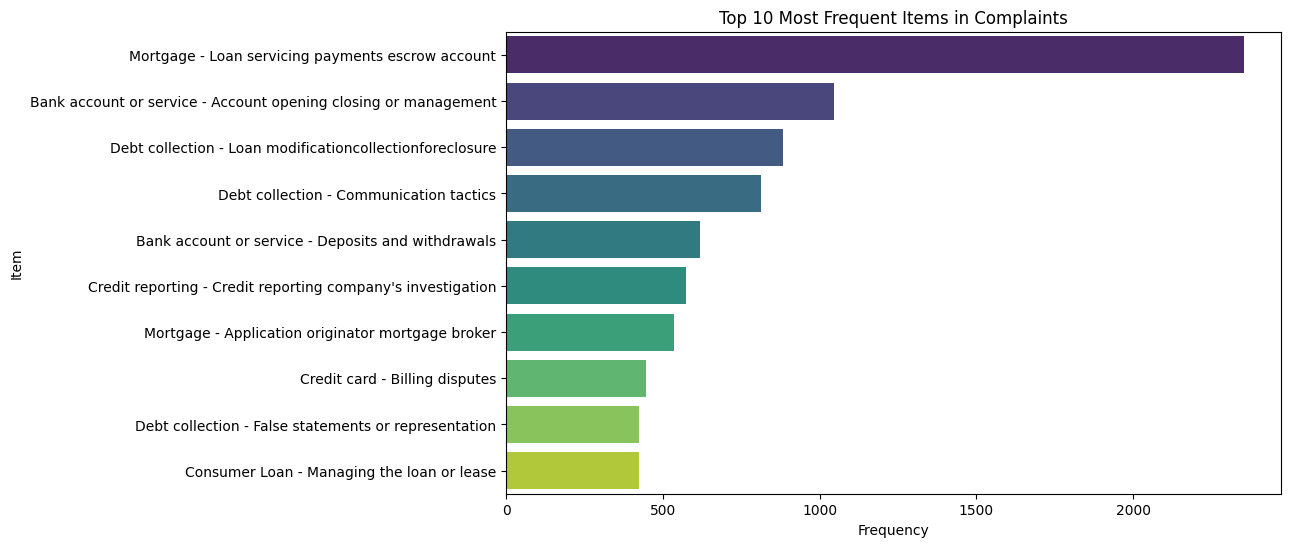

In [239]:
plt.figure(figsize=(10, 6))
sns.barplot(x=item_frequencies.values, y=item_frequencies.index, palette="viridis")
plt.title("Top 10 Most Frequent Items in Complaints")
plt.xlabel("Frequency")
plt.ylabel("Item")
plt.show()